In [1]:
# Import Libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# Create Master Path

path = r'/Users/jagpreetbatth/Desktop/Career Foundry/Python/11-2021 Instacart Basket Analysis'

In [3]:
# Verify Path

path

'/Users/jagpreetbatth/Desktop/Career Foundry/Python/11-2021 Instacart Basket Analysis'

In [4]:
# Import updated orders_products_merged

ords_prods_merge = pd.read_pickle(os.path.join(path, 'Data','Prepared Data', 'ords_prods_added_flags.pkl'))

In [5]:
# Check Shape

ords_prods_merge.shape

(32641268, 24)

In [6]:
# Verify Correct Import

ords_prods_merge.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,average_purchase_price,spending_flag,median_days_since_prior_order,order_frequency_flag
0,2398795,1.0,2.0,3.0,7.0,15.0,196.0,1.0,1.0,Soda,...,Mid-range product,Regularly busy,Least busy days,Average orders,11.0,Regular customer,6.372222,Low spender,20.0,Regular customer
1,2398795,1.0,2.0,3.0,7.0,15.0,10258.0,2.0,0.0,Pistachios,...,Low-range product,Regularly busy,Least busy days,Average orders,11.0,Regular customer,6.372222,Low spender,20.0,Regular customer
2,2398795,1.0,2.0,3.0,7.0,15.0,12427.0,3.0,1.0,Original Beef Jerky,...,Low-range product,Regularly busy,Least busy days,Average orders,11.0,Regular customer,6.372222,Low spender,20.0,Regular customer
3,2398795,1.0,2.0,3.0,7.0,15.0,13176.0,4.0,0.0,Bag of Organic Bananas,...,Mid-range product,Regularly busy,Least busy days,Average orders,11.0,Regular customer,6.372222,Low spender,20.0,Regular customer
4,2398795,1.0,2.0,3.0,7.0,15.0,26088.0,5.0,1.0,Aged White Cheddar Popcorn,...,Low-range product,Regularly busy,Least busy days,Average orders,11.0,Regular customer,6.372222,Low spender,20.0,Regular customer


# Creating Bar Charts

<AxesSubplot:>

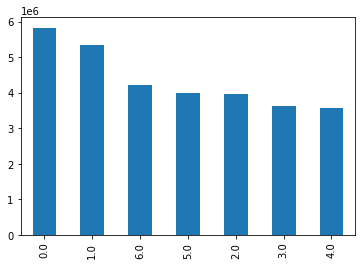

In [7]:
# Create bar chart showing order frequency based on day of week

ords_prods_merge['orders_day_of_week'].value_counts().plot.bar()

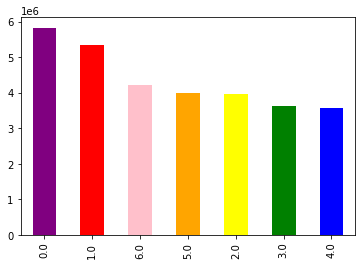

In [8]:
# Add color to bar Chart

bar = ords_prods_merge['orders_day_of_week'].value_counts().plot.bar(color =['purple', 'red', 'pink', 'orange', 'yellow', 'green', 'blue'])

In [9]:
# Export Visualization

bar.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'bar_orders_dow.png'))

# Creating Histograms and Scatterplots

<AxesSubplot:ylabel='Frequency'>

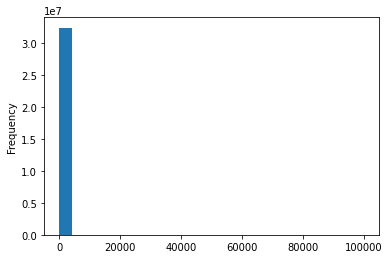

In [10]:
# Create histogram for 'prices' column

ords_prods_merge['prices'].plot.hist(bins = 25)

#### Note how there is a single bar due to entry error of extreme price outliers

<AxesSubplot:xlabel='prices', ylabel='prices'>

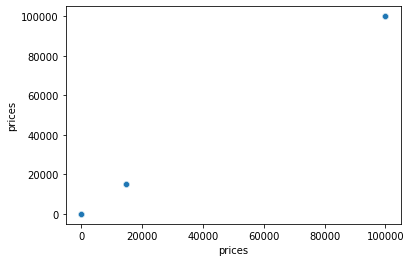

In [11]:
# Create Scatterplots for 'prices' column

sns.scatterplot(x = 'prices', y = 'prices',data = ords_prods_merge)

In [12]:
# Check for outliers effecting data

ords_prods_merge.loc[ords_prods_merge['prices'] > 100]

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,average_purchase_price,spending_flag,median_days_since_prior_order,order_frequency_flag
1429,912404,17.0,12.0,2.0,14.0,5.0,21553.0,5.0,0.0,Lowfat 2% Milkfat Cottage Cheese,...,High-range product,Regularly busy,Regularly busy,Most orders,41.0,Loyal customer,109.670103,High spender,5.0,Frequent customer
1491,603376,17.0,22.0,6.0,16.0,4.0,21553.0,3.0,1.0,Lowfat 2% Milkfat Cottage Cheese,...,High-range product,Regularly busy,Regularly busy,Most orders,41.0,Loyal customer,109.670103,High spender,5.0,Frequent customer
15448,3264360,135.0,2.0,2.0,21.0,13.0,21553.0,6.0,0.0,Lowfat 2% Milkfat Cottage Cheese,...,High-range product,Regularly busy,Regularly busy,Average orders,5.0,New customer,1250.245833,High spender,12.0,Regular customer
15454,892534,135.0,3.0,0.0,8.0,12.0,21553.0,3.0,1.0,Lowfat 2% Milkfat Cottage Cheese,...,High-range product,Busiest day,Busiest days,Most orders,5.0,New customer,1250.245833,High spender,12.0,Regular customer
50648,229704,342.0,8.0,1.0,19.0,30.0,21553.0,9.0,0.0,Lowfat 2% Milkfat Cottage Cheese,...,High-range product,Regularly busy,Busiest days,Most orders,17.0,Regular customer,120.090909,High spender,23.0,Non-frequent customer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32619914,3386399,NaN,NaN,NaN,NaN,NaN,21553.0,11.0,0.0,Lowfat 2% Milkfat Cottage Cheese,...,High-range product,Regularly busy,Regularly busy,Fewest orders,NaN,NaN,NaN,NaN,NaN,NaN
32622057,3389756,NaN,NaN,NaN,NaN,NaN,21553.0,9.0,0.0,Lowfat 2% Milkfat Cottage Cheese,...,High-range product,Regularly busy,Regularly busy,Fewest orders,NaN,NaN,NaN,NaN,NaN,NaN
32626835,3396879,NaN,NaN,NaN,NaN,NaN,21553.0,1.0,0.0,Lowfat 2% Milkfat Cottage Cheese,...,High-range product,Regularly busy,Regularly busy,Fewest orders,NaN,NaN,NaN,NaN,NaN,NaN
32632989,3407602,NaN,NaN,NaN,NaN,NaN,21553.0,1.0,0.0,Lowfat 2% Milkfat Cottage Cheese,...,High-range product,Regularly busy,Regularly busy,Fewest orders,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
# Assign missing values

ords_prods_merge.loc[ords_prods_merge['prices'] >100, 'prices'] = np.nan

In [14]:
# Verify Assignment

ords_prods_merge['prices'].max()

25.0

<AxesSubplot:ylabel='Frequency'>

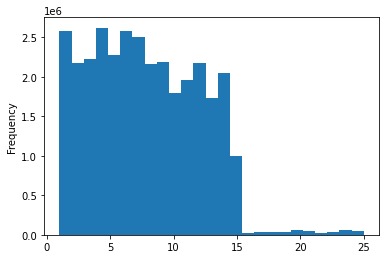

In [18]:
# Re-try histogram for 'prices' column

ords_prods_merge['prices'].plot.hist(bins = 25)

<AxesSubplot:ylabel='Frequency'>

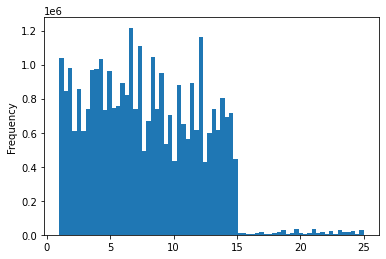

In [24]:
# Increase level of granularity to 70 bins

ords_prods_merge['prices'].plot.hist(bins = 70)

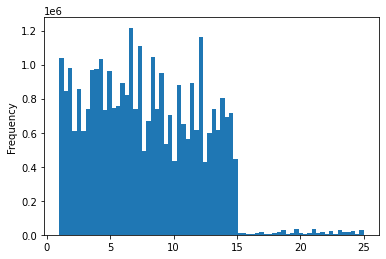

In [26]:
# Define Hist

hist = ords_prods_merge['prices'].plot.hist(bins = 70)

In [27]:
# Export histogram

hist.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'hist_orders_dow.png'))

# Sampling Data

In [28]:
# Generate list holding true/false values in order to test np.random.rand() <= 0.7

np.random.seed(4)
dev = np.random.rand(len(ords_prods_merge)) <= 0.7

In [29]:
dev

array([False,  True, False, ...,  True, False,  True])

In [30]:
# Store 70% of the sample in the dataframe big 

big = ords_prods_merge[dev]

In [31]:
# Store 30% of the sample in the dataframe small

small = ords_prods_merge[~dev]

In [32]:
# Check row count

len(ords_prods_merge)

32641268

In [33]:
len(small)

9791523

In [34]:
len(big)

22849745

# Create Line Chart

In [35]:
# Designate columns

df_2 = small[['orders_day_of_week','prices']]

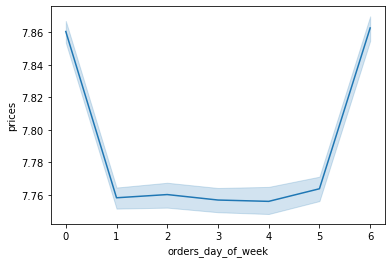

In [36]:
# Create line chart 

line = sns.lineplot(data = df_2, x = 'orders_day_of_week',y = 'prices')

#### TAKES A VERY LONG TIME TO PROCESS!